In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

## Wine Reviews dataset

There were two data files: *_first150k.csv and *-130k-v2.csv. I chose to use the latter because as the author of the data describes (https://www.kaggle.com/zynicide/wine-reviews), the second version has more information to erase duplicate rows. 

In [2]:
wine_reviews = pd.read_csv("wine-reviews/winemag-data-130k-v2.csv")
len(wine_reviews)

129971

In [3]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Remove duplicate entries

In [4]:
wine_reviews = wine_reviews.drop_duplicates('description')
len(wine_reviews)

119955

We see that there were 10,016 duplicate entries. 

### Remove punctuations

In [12]:
wine_reviews['description'] = wine_reviews['description'].str.replace("[.,!?\\-]", "")

In [13]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,Aromas include tropical fruit broom brimstone ...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,This is ripe and fruity a wine that is smooth ...,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,Tart and snappy the flavors of lime flesh and ...,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,Pineapple rind lemon pith and orange blossom s...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,Much like the regular bottling from 2012 this ...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Histograms

First check the general histogram of the entire dataset

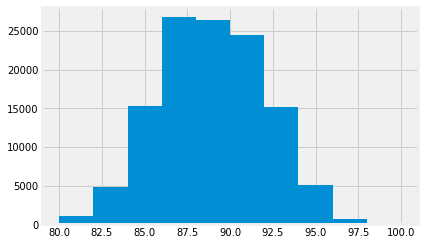

In [14]:
wine_reviews['points'].hist(bins = 10)

Next check the histogram of only Vinho Verdes

### Assigning *logit_scores*
We assign a binary score of {0, 1} based on whether a wine is excellent or good. The cut-off is arbitrary; we choose to classify the top $20\%$ of wines as excellent. 

We notice that while a threshold of $92$ constitutes $\sim 18\%$ of all the reviews, it is a rather high threshold for Vinho Verdes; only $\sim 3.4\%$ Vinho Verdes meet the cut-off. Thus, we choose a threshold of $90$ which gives us roughly $20\%$ of Vinho Verdes as excellent. 

In [17]:
len(wine_reviews[wine_reviews['points'] >= 90])/len(wine_reviews)*100

37.9967487807928

In [18]:
wine_reviews['logit_score'] = wine_reviews['points'] >= 90
wine_reviews = wine_reviews.replace({False:0, True:1})
print(len(wine_reviews))
wine_reviews

119955


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,logit_score
0,0,Italy,Aromas include tropical fruit broom brimstone ...,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0
1,1,Portugal,This is ripe and fruity a wine that is smooth ...,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,0
2,2,US,Tart and snappy the flavors of lime flesh and ...,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,0
3,3,US,Pineapple rind lemon pith and orange blossom s...,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,0
4,4,US,Much like the regular bottling from 2012 this ...,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,0
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,0
6,6,Italy,Here's a bright informal red that opens with a...,Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,0
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,0
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel,0
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,0


Save the dataset

In [19]:
wine_reviews.to_csv("wine-reviews-no-punc.csv")

### Replace digits in description with nothing 

In [20]:
wine_reviews['description'] = wine_reviews['description'].str.replace(r"\d", "")

In [21]:
wine_reviews.to_csv("wine-reviews-no-punc-digits.csv")

### Extract only Vinho Verde reviews

In [5]:
wine_reviews_VV = wine_reviews[wine_reviews['province'] == 'Vinho Verde']
len(wine_reviews_VV)

382

In [6]:
wine_reviews_VV.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
613,613,Portugal,"With its light prickle on the tongue, this is ...",Paço de São Lourenço,87,12.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Solar de Pinheiro 2012 Paço de São Lourenço Wh...,Portuguese White,Solar de Pinheiro
723,723,Portugal,"In a medium sweet style, the wine has a light ...",Santola,85,8.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Messias 2015 Santola White (Vinho Verde),Portuguese White,Messias
726,726,Portugal,A rose pink colored wine that is dry and with ...,Casa de Paços,85,9.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Quinta de Paços 2015 Casa de Paços Rosé (Vinho...,Rosé,Quinta de Paços
907,907,Portugal,A fresh lemon-flavored wine with crisp acidity...,Bruto,87,30.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Casa de Vilacetinho 2013 Bruto Avesso (Vinho V...,Avesso,Casa de Vilacetinho
927,927,Portugal,This is crisp and fresh medium-sweet wine. It ...,Casal Garcia Rosé,87,12.0,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Aveleda NV Casal Garcia Rosé Sparkling (Vinho ...,Portuguese Sparkling,Aveleda


## Wine Quality dataset

First read in wine quality data

In [14]:
wine_quality = pd.read_csv("wine-quality/winequalityN.csv")

In [15]:
len(wine_quality)

6497

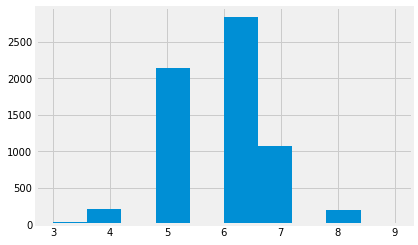

In [16]:
wine_quality['quality'].hist(bins = 10)

### Duplicate Removal
Check how many duplicated rows are there:

In [17]:
len(wine_quality[wine_quality.duplicated()])

1168

Drop all the duplicate rows

In [18]:
wine_quality = wine_quality.drop_duplicates()
len(wine_quality)

5329

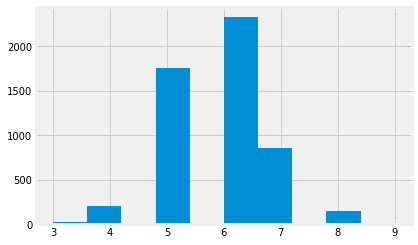

In [19]:
wine_quality['quality'].hist()

### NaN rows removal
Remove any wine reviews that has NaN values in any of the columns

In [20]:
wine_quality = wine_quality.dropna()
len(wine_quality)

5295

### Assigning *logit_score*

We see that scores 7+ form roughly 20% of the sample.

In [21]:
len(wine_quality[wine_quality['quality'] >= 7])/len(wine_quality)*100

18.980169971671387

Hence we define a binary classification *logit_score* = {$0, 1$} where if the *quality* score of a wine is $>= 7$ then it is given a *logit_score* of $1$.

In [22]:
wine_quality['logit_score'] = wine_quality['quality'] >= 7
wine_quality = wine_quality.replace({False:0, True:1})
wine_quality.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,logit_score
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


### Randomly sampling $n$ wines from the dataframe

In [23]:
#number of samples
n = len(wine_reviews_VV) #same length as the final review dataset
df_final = wine_quality.sample(n)

len(df_final)

382

In [24]:
df_final.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,logit_score
971,white,6.0,0.27,0.19,1.7,0.020,24.0,110.0,0.98980,3.32,0.47,12.6,7,1
4305,white,5.9,0.25,0.24,7.4,0.044,21.0,113.0,0.99462,3.38,0.58,10.5,6,0
5597,red,11.8,0.38,0.55,2.1,0.071,5.0,19.0,0.99860,3.11,0.62,10.8,6,0
2755,white,6.6,0.34,0.18,6.4,0.082,47.0,240.0,0.99710,3.42,0.48,9.2,5,0
5664,red,8.8,0.59,0.18,2.9,0.089,12.0,74.0,0.99738,3.14,0.54,9.4,5,0


Save the sampled dataset

In [25]:
df_final.to_csv("wine-quality_preprocessed.csv")